# Solutions for 2D solute transport in uniform background flow
This notebook shows some examples of two-dimensional solute transport in uniform background flow. The examples are based on [Wexler (1992)](https://doi.org/10.3133/twri03B7), as is the underlying code.

Solutions for 2D solute transport are applicable to relatively thin aquifers where the solute is well-mixed along the vertical axis and vertical concentration gradients become negligible. Alternatively, 2D solutions can be applied to a cross-section along the centerline of a plume where the model y-dimension represents the vertical axis. In those cases, it is assumed that the concentration gradients perpendicular to the centerline can be neglected as is the case for wide solute sources. 

A solution for a point source in an infinite aquifer is presented, as well as solutions for so-called 'strip' sources, which are uniform constant-concentration sources in a semi-infinite aquifer. The source location is placed at `x=0` and extends along the y-axis.

The solutions for transport in uniform background flow are available as functions from the `uniform` module and can be imported and called as:

In [1]:
from adepy.uniform import point2

point2(
    c0=100.0,
    x=[5, 10],
    y=[0, 0],
    t=60,
    v=0.05,
    n=0.25,
    al=1.0,
    ah=0.1,
    Qa=1,
    xc=0,
    yc=0,
)

array([603.55375676,   3.93583344])

## Infinite aquifer with a continuous point source

The `point2` solution can be applied to a continuous point source in an infinite aquifer. As discussed above, this may be applicable if the aquifer is well-mixed along the vertical axis. Another use case is if the point source represents a line source fully screened across the aquifer's thickness and with an even distribution of injected mass along the line length. A third-type boundary is applied at the point source whereby water with a known, constant concentration is injected at a constant rate per unit aquifer thickness. It is assumed that the injection rate is small so that the flow field remains uniform.

As an example, an abandoned borehole penetrates a brackish confined aquifer and is discharging into an overlying freshwater aquifer. This corresponds to sample problem 5 in [Wexler (1992)](https://doi.org/10.3133/twri03B7).

In [2]:
# imports used across the examples
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

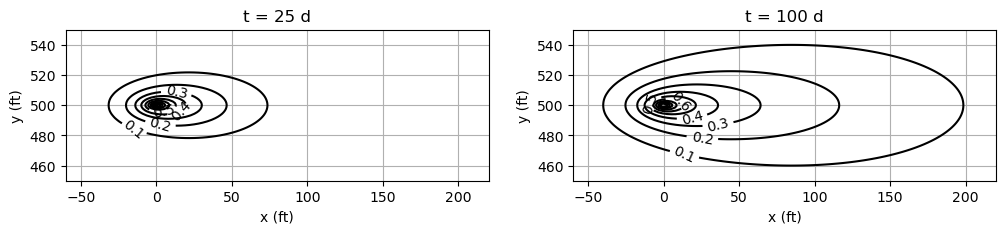

In [3]:
# Import the 2D solution for solute transport for a continuous point source in an infinite aquifer
from adepy.uniform import point2

Q = 1250  # injection rate, ft³/d
B = 100  # aquifer thickness, ft

v = 2  # # linear groundwater flow velocity, ft/h
al = 30  # longitudinal dispersivity, ft
ah = 6  # horizontal transverse dispersivity, ft
c0 = 1000  # injection concentration
xc = 0  # point source x-coordinate
yc = 500  # point source y-coordinate
n = 0.25  # aquifer porosity, -

Qa = Q / B  # injection rate per unit aquifer thickness, ft²/d

# Set the output x-y coordinates and t values
x, y = np.meshgrid(np.linspace(-60, 220, 100), np.linspace(450, 550, 100))
t = [25, 100]

# calculate and plot the normalized concentrations at two times
c = []
fig, ax = plt.subplots(1, len(t), figsize=(12, 4))

for i, ti in enumerate(t):
    c.append(point2(c0, x, y, ti, v, n, al, ah, Qa, xc, yc))
    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"t = {ti} d")

## Bounded aquifer with a strip source



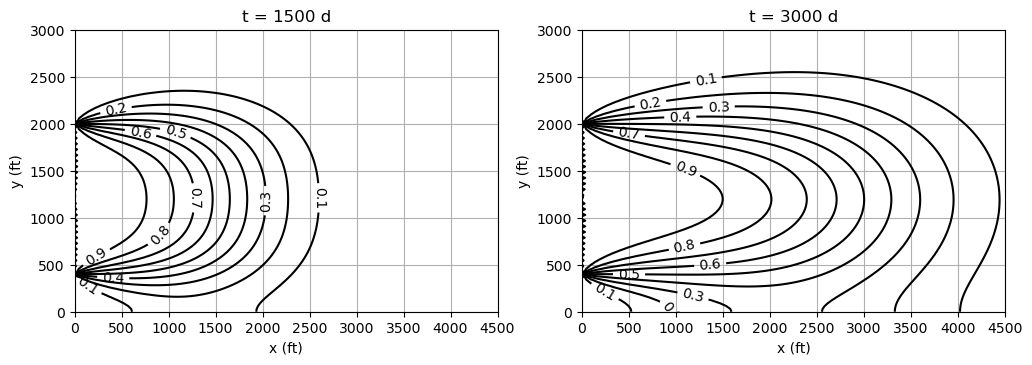

In [4]:
from adepy.uniform import stripf

w = 3000
y1 = 400
y2 = 2000
v = 1
al = 200
ah = 60
c0 = 1000


x, y = np.meshgrid(np.linspace(0, 4500, 100), np.linspace(0, 3000, 100))
t = [1500, 3000]

c = []
fig, ax = plt.subplots(1, len(t), figsize=(12, 4))

for i, ti in enumerate(t):
    c.append(stripf(c0, x, y, ti, v, al, ah, y1, y2, w))

    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"t = {ti} d")

## Semi-infinite aquifer with a strip source

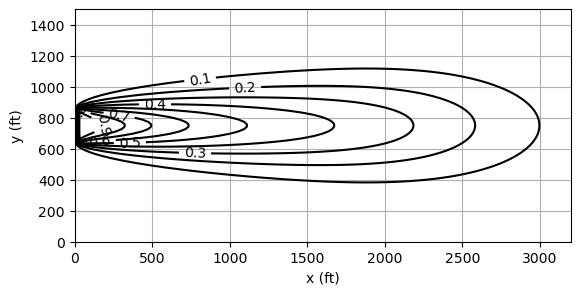

In [5]:
from adepy.uniform import stripi

y1 = 635
y2 = 865
v = 1.42
al = 70
ah = 14
c0 = 40

x, y = np.meshgrid(np.linspace(0, 3200, 100), np.linspace(0, 1500, 100))
t = 5 * 365

c = stripi(c0, x, y, t, v, al, ah, y1, y2)

cs = plt.contour(x, y, c / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
plt.clabel(cs, fmt="%.1f")
plt.gca().set_aspect(1.0)
plt.xlabel("x (ft)")
plt.ylabel("y (ft)")
plt.grid()

## Semi-infinite aquifer with a Gaussian strip source

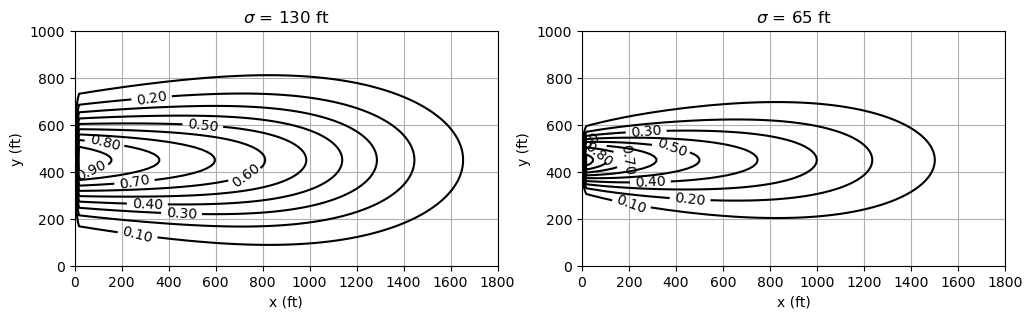

In [6]:
from adepy.uniform import gauss

c0 = 1000
sigma = [130, 65]
yc = 450
v = 4
Dx = 150
Dy = 30

x, y = np.meshgrid(np.linspace(0, 1800, 100), np.linspace(0, 1000, 100))
t = 300

c = []
fig, ax = plt.subplots(1, len(sigma), figsize=(12, 6))

for i, s in enumerate(sigma):
    c.append(gauss(c0, x, y, t, v, al, ah, yc, s))

    cs = ax[i].contour(x, y, c[i] / c0, colors="black", levels=np.arange(0.1, 1.1, 0.1))
    ax[i].clabel(cs, fmt="%.2f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"$\\sigma$ = {s:.0f} ft")